## Regularyzacja L2, L1, L1+L2


W tym zadaniu musisz dokonać obliczeń regresji liniowej z regularyzacją.

Pomiń sens i znaczenie zmiennych. We wszystkich modelach poniżej objaśniasz zmienną

sensor_measurement_4.



1. Pobierz załączone dane.



Data.zip


2. Wczytaj dane. Rozwiąż towarzyszące problemy. Nadaj odpowiednie nazwy zmiennym.



3. Przygotuj się do sformułowania modelu regresji dla zmiennej objaśniającej

sprawdź zawartość pozostałych zmiennych
SAMODZIELNIE odrzuć zmienne nienadające się do modelu
WYJAŚNIJ krótko swoją decyzję


3. Zbuduj ręcznie model regresji liniowej (lm).

dobierz zmienne obajśniające według swojego uznania
zbuduj model treningowy (R2 >= 0.60)
zbuduj model testowy
oblicz i zinterpretuj współczynnik determinancji


4. Zbuduj modele regresji dobierając parametr alfa

Ridge (L2)
Lasso (L1)
Elastic Net (L1+L2)
wybierz odpowiednie wartości parametru lambda
wybór UZASADNIJ


5.  Zaprezentuj / wypisz współczynniki wszystkich czterech modeli (forma dowolna).



6. Zbuduj ramkę zawierającą współczynnik determinancji dla wszystkich modelów treningowych i testowych. Oczekiwany format (liczby przykładowe).



Ramka.01.png


7. Zinterpretuj różnice pomiędzy współczynnikami treningowymi i testowymi modeli. WYJAŚNIJ z jakim dopasowaniem modelu mamy do czynienia i  dlaczego.



In [1]:
import pandas as pd
import numpy as np
from os import getcwd,chdir
from sklearn import sklearn
sklearn.sklearn.set_config(display='diagram')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = "notebook",palette = "inferno")

In [2]:
# Raw URL for github files
url = ( "https://raw.githubusercontent.com/MichauJ/Learning-ML/refs/heads/main/Data/dataset.variables.txt",
       "https://raw.githubusercontent.com/MichauJ/Learning-ML/refs/heads/main/Data/dataset.train.txt",
    "https://raw.githubusercontent.com/MichauJ/Learning-ML/refs/heads/main/Data/dataset.test.txt")
columns = pd.read_csv(url[0],header = None)
columns_names = [x[0] for x in columns.values.tolist()]
(train_df,
 test_df) = (pd.read_csv(url[1], sep=" ",header = None),
                            pd.read_csv(url[2], sep = " ", header = None))

In [3]:
# Processing both df - resetting index, renaming columns, droping empty columns
for d in (train_df,test_df):
    d.reset_index()
    d.columns = columns_names+[""]+[""]
    d.dropna(axis=1,inplace = True)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   op_setting_1           20631 non-null  float64
 3   op_setting_2           20631 non-null  float64
 4   op_setting_3           20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  float64
 15  se

In [5]:
train_df.head(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
train_df.describe()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [7]:
#Since some columns are not displayed in the standard call of describe function, here I display those hidden ones
train_df.iloc[:, 7:13].describe() #indexing: first rows - all, then selected columns.

,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8
count,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000
mean,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652
std,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985
min,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000
25%,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000
50%,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000
75%,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000
max,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000


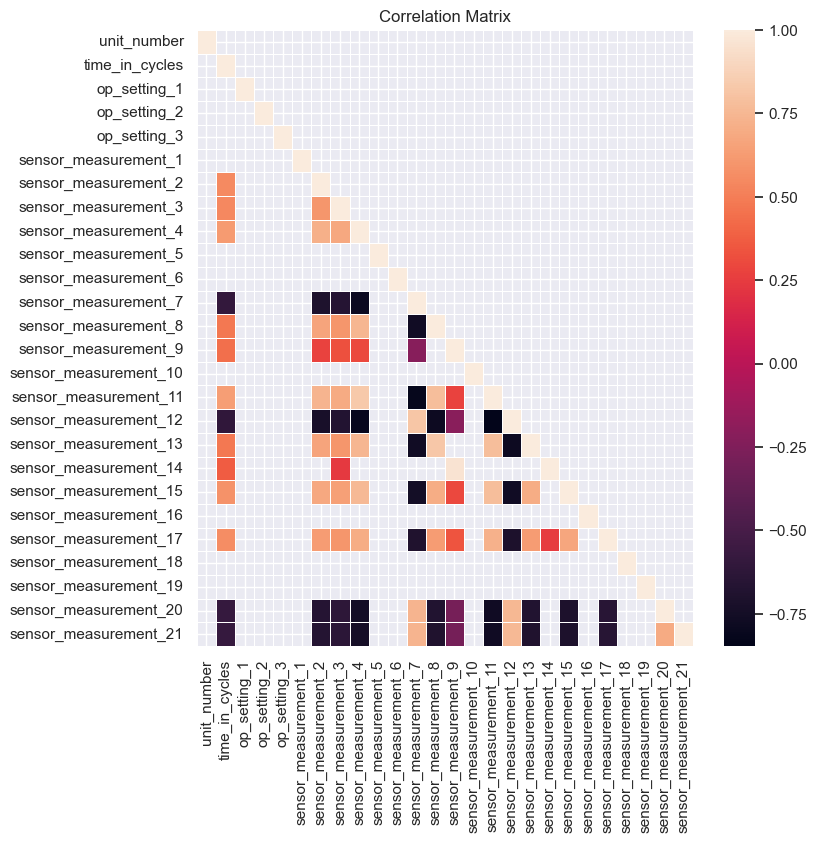

In [8]:
plt.figure(figsize=(8, 8))
correlation_matrix = train_df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
masked_correlation_matrix = correlation_matrix.mask(mask).where(abs(correlation_matrix) > 0.2) #masking weak correlations
np.fill_diagonal(masked_correlation_matrix.values, 1)
sns.heatmap(masked_correlation_matrix, annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

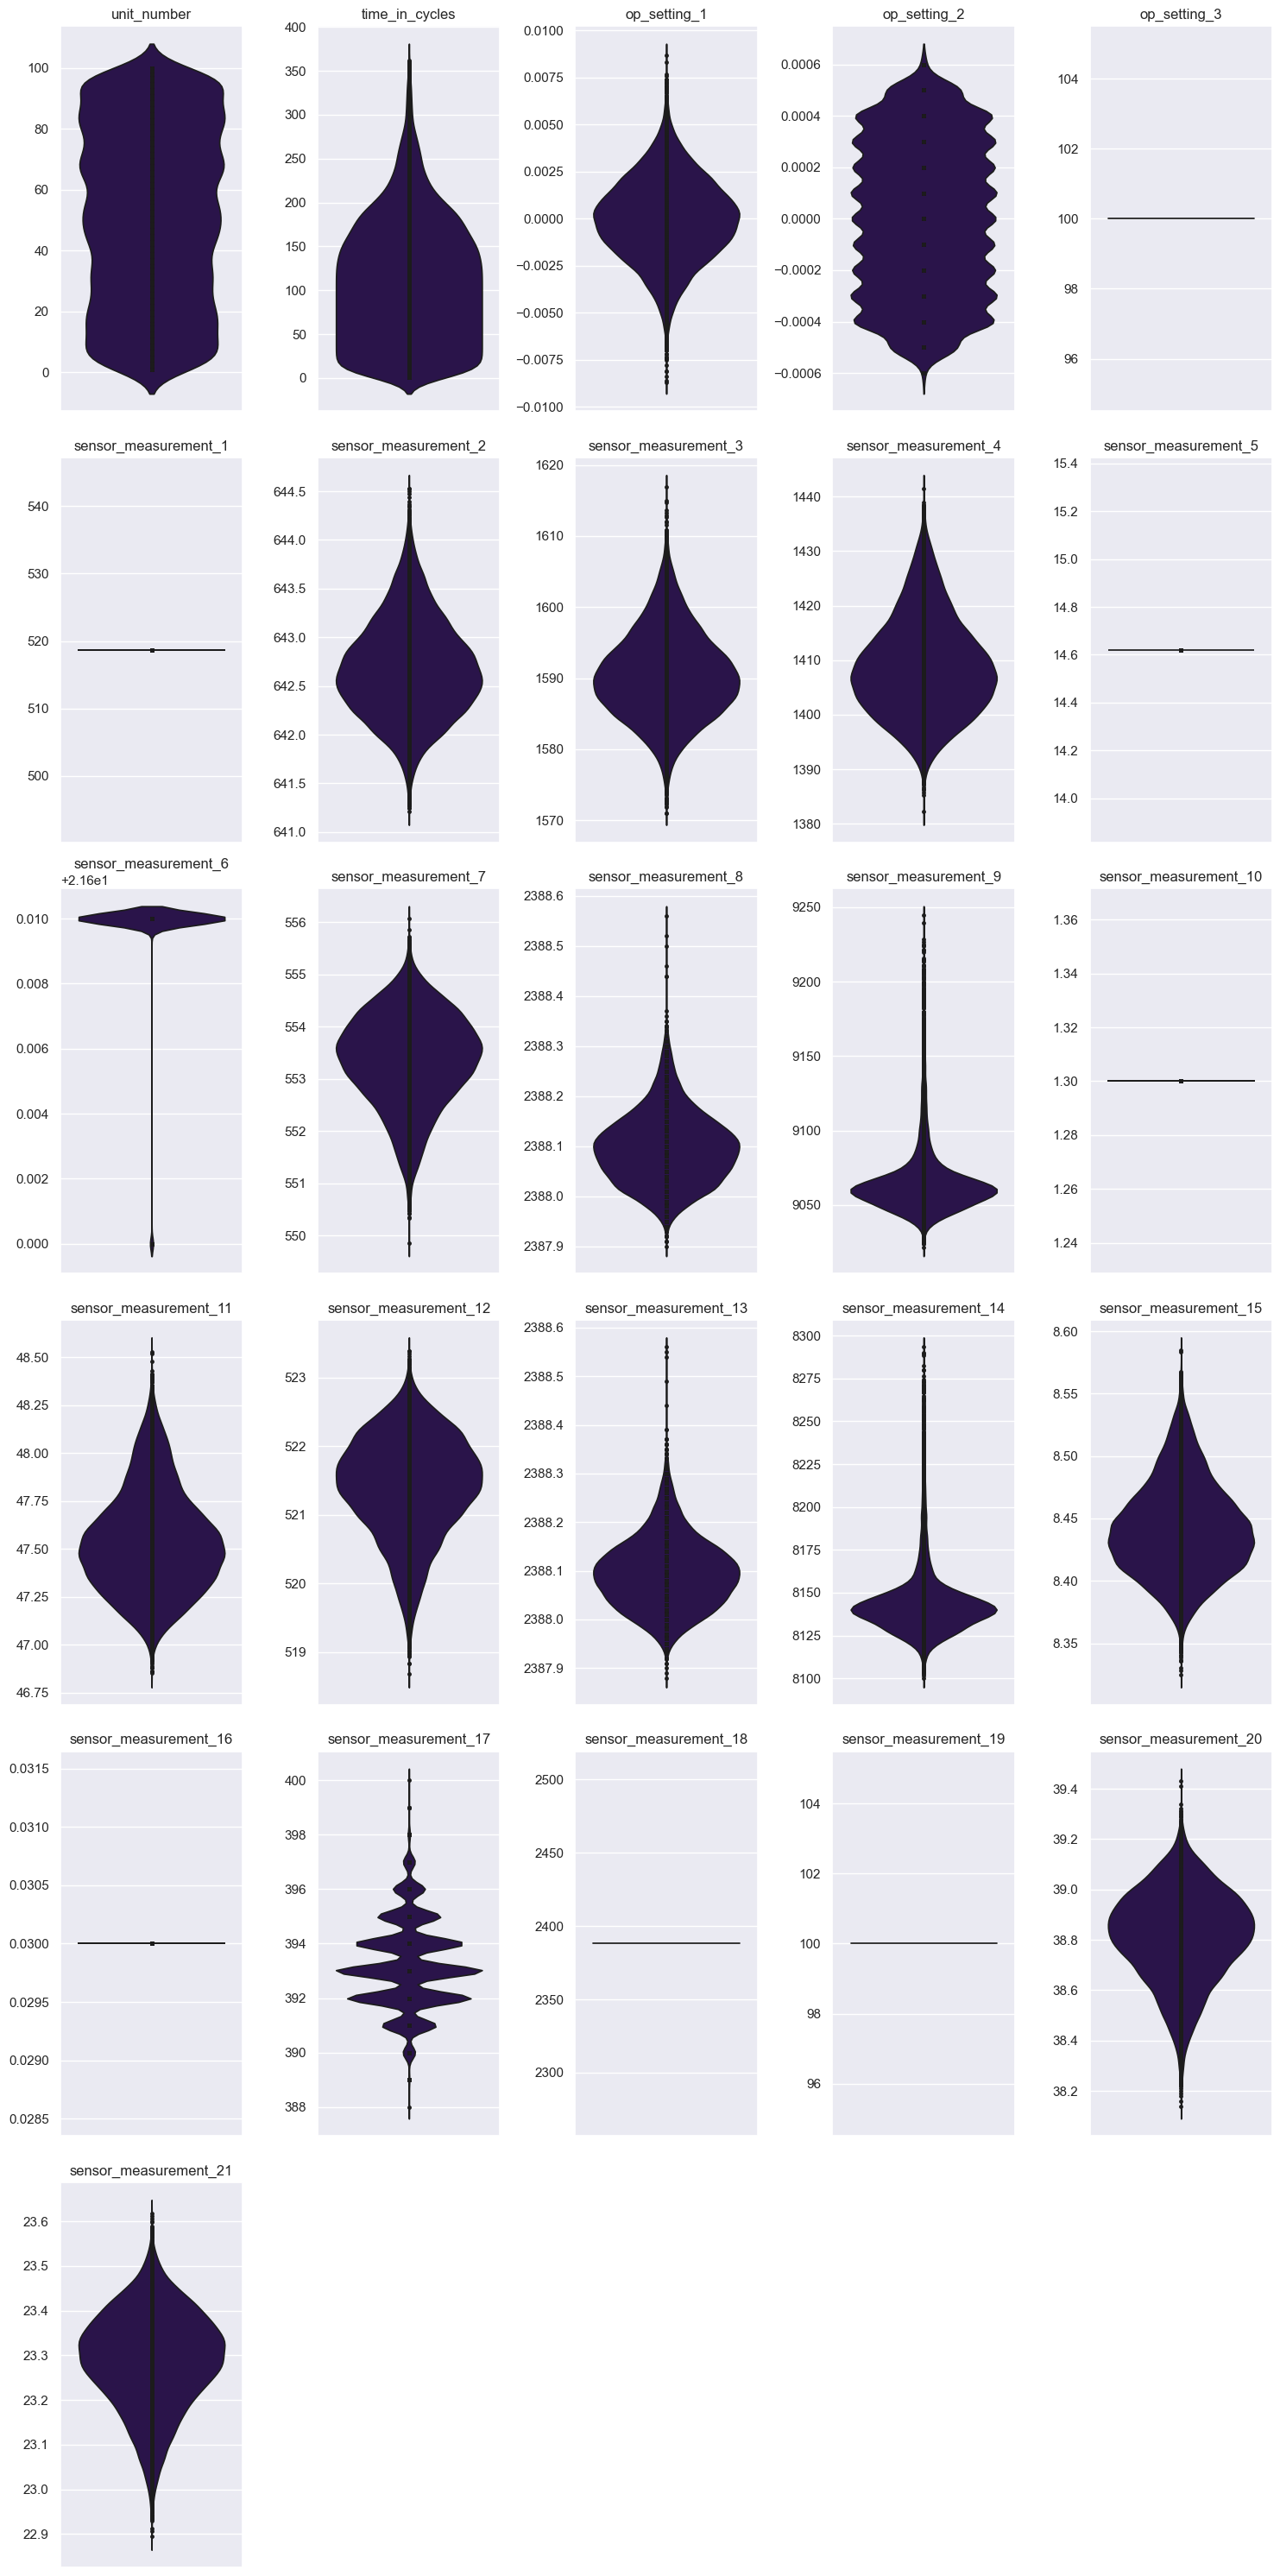

In [9]:
num_vars = train_df.select_dtypes(include='number')
n_cols = 5  # Liczba kolumn
n_rows = int(np.ceil(len(num_vars.columns) / n_cols)) 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows), sharey=False)
axes = axes.flatten()  
for i, column in enumerate(num_vars.columns):
    sns.violinplot(data=num_vars, y=column, ax=axes[i], inner="point")
    axes[i].set_title(column)
    axes[i].set_ylabel("")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### Excluding variables from models

In [10]:
# Variables op_setting_3, sensor_measurement_18 i 19 are constans so I exclude them from further analysis.
# Looking at the distribution of sensor measurements 1,5,10,16 they are almost constant so I exclude them as well
# Sensors 7,12,20,21 are strongly correlated with others so I exclude them from the model
#Unit_number does not bring numerical values to model as this is ID
vars_to_drop = ["op_setting_3","sensor_measurement_18","sensor_measurement_19","unit_number","sensor_measurement_1",
                "sensor_measurement_5","sensor_measurement_10","sensor_measurement_16","sensor_measurement_20",
                "sensor_measurement_21","sensor_measurement_12","sensor_measurement_7"]
for d in (train_df,test_df):
    d.drop(columns = vars_to_drop, inplace=True)

#### Preparing dependent variables and defining processing pipeline 

In [11]:
y_train,y_test = train_df['sensor_measurement_4'].copy(),test_df['sensor_measurement_4'].copy()
# Removing the target column
train_df = train_df.drop(columns=['sensor_measurement_4'])
test_df = test_df.drop(columns=['sensor_measurement_4'])

In [12]:
# Defining the processing pipeline
preprocessing = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number))
)


### Comparison of different models

##### Setting up dictionaries for results and parameters for GridSearch method 

In [13]:
models_dict = {}
results_train = {}  
results_test = {}
best_params = {}
# parameter grids for GridSearch
param_grids = {
    "Ridge": {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
    "Lasso": {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]}
}

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

##### Training models 

In [15]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Going through different models
for name, model in models.items():
    pipeline = make_pipeline(preprocessing, model)
    if name in param_grids:  # Check if the model requires tuning
        grid_search = GridSearchCV(pipeline, param_grids[name], scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(train_df, y_train)
        best_pipeline = grid_search.best_estimator_  # Best model
        best_params[name] = grid_search.best_params_  # Save best parameters
    else:
        best_pipeline = pipeline.fit(train_df, y_train)  # For LinearRegression (no tuning)
    # the best model
    models_dict[name] = best_pipeline
    y_train_pred = best_pipeline.predict(train_df)
    y_test_pred = best_pipeline.predict(test_df)
    results_train[name + " - RMSE"] = root_mean_squared_error(y_train, y_train_pred)
    results_train[name + " - R²"] = r2_score(y_train, y_train_pred)
    results_test[name + " - RMSE"] = root_mean_squared_error(y_test, y_test_pred)
    results_test[name + " - R²"] = r2_score(y_test, y_test_pred)
results_df = pd.DataFrame([results_train, results_test], index=["Train", "Test"]).T

print("\n Best Regularization Parameters")
for model, params in best_params.items():
    print(f"{model}: {params}")

results_df


 Best Regularization Parameters
Ridge: {'ridge__alpha': 100}
Lasso: {'lasso__alpha': 0.01}
ElasticNet: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 1}


,Train,Test
LinearRegression - RMSE,4.311037,4.301726
LinearRegression - R²,0.770575,0.586300
Ridge - RMSE,4.311110,4.301430
Ridge - R²,0.770567,0.586357
Lasso - RMSE,4.311372,4.301393
Lasso - R²,0.770539,0.586364
ElasticNet - RMSE,4.311372,4.301393
ElasticNet - R²,0.770539,0.586364


#### Interpretation of the results 